# TP 6: La méthode des éléments finis pour les équations élliptiques 1D

Dans ce TP, on s'intéresse à la résolution approchée de problèmes aux limites pour des équation elliptiques en dimension 1, par la
méthode des éléments finis.

## 1. Formulation variationnelle d'un problème aux limites avec conditions aux limites de Dirichlet homogènes.

On s'intérèsse au problème :

$$
(P)\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]0,1[,\\
&u(0)=u(1)=0,
\end{aligned}
\right.
$$
où $f:[0,1]\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée. Dans ces conditions, on peut montrer que le problème $(P)$ admet une unique solution de classe $C^2([0,1]).$

On considère l'espace de Sobolev 
$$ 
V:=H^1_0(]0,1[) = \left\{ v \in L^2(]0,1[)\,:\, v' \in L^2(]0,1[),\ 
v(0)=v(1)=0 \right\},
$$
muni de la norme $\|v\|_V =\big(\|v\|^2_{L^2(]0,1[)}+\|v'\|^2_{L^2(]0,1[)}\big)^\frac12.$ On peut montrer que $\mathcal{C}^\infty_c(]0,1[)$ est dense dans $V,$ pour la norme de $\|\cdot\|_V.$

**Q1)** Montrer que si $u$ est une solution de (P) de classe $C^2,$ alors $u$ vérifie
$$
(PV)\ \ \ u\in V\ \textrm{et}\ \int_0^1 u'(x)v'(x)\,dx+\int_0^1 u(x)v(x)\,dx=\int_0^1 f(x)v(x)\,dx,\ \ \ \forall\ v\ \in\ V.
$$
Montrer inversement que si $u$ est solution de $(PV)$ et $u\in C^2([0,1]),$ alors $u$ est solution de $(P).$  

Le problème $(PV)$ s'appelle formulation variationnelle du problème $(P).$ On remarque que l'on peut écrire $(PV)$ sous la forme 
\begin{equation*}
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(v,u)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où, pour $u,\ v\in V,$ 
$$
a(v,u)=\int_0^1 u'(x)v'(x)\,dx+\int_0^1 u(x)v(x)\,dx
$$ 
et 
$$
L(v)=\int_0^1 f(x)v(x)\,dx.
$$



On peut montrer que si $f\in C([0,1]),$ alors l'unique solution de $(PV)$ est de classe $C^2$ et est donc l'unique solution de $(P).$ 

## 2. Approximation par la méthode des éléments finis.

L'idée de la méthode des éléments finis est de chercher une solution approchée de $(PV)$ dans un sous-espace vectoriel de dimension finie $n\in\mathbb{N}$, que l'on note $V^n.$ Autrement dit, on cherche $u^n\in V^n$ tel que
$$
(P_n V)\ \ \ \ \ \ \ \ \ a(v^n,u^n)=L(v^n),\ \,\forall\ v^n\in V^n. 
$$

**Q2)** Soit $(\varphi_1,\dots,\varphi_n)$ une base de $V^n.$ Montrer que $u^n=\displaystyle{\sum_{i=1}^n u_i\varphi_i}$ est solution de $(P_n V)$ si et seulement si le vecteur $U=(u_1,\dots,u_n)^T$ est solution d'un système linéaire 
$$
KU+MU=F,
$$
où $K$ et $M$ sont des matrices de $\mathcal{M}_n(\mathbb{R})$ et $F$ un vecteur de $\mathbb{R}^n$ que l'on explicitera.

**Q3)** Soit $A=K+M.$ Montrer que le problème $(P_n V)$ admet une unique solution, en montrant que la matrice $A$ est inversible.

**$\ $**

**Choix de l'espace $V^n$ - éléments finis P1**

On discrétise l'intervalle $]0,1[$ en $n+1$ sous-intervalles $]x_i,x_{i+1}[,\ i=0,\dots,n,$ où $x_i=ih,$ avec $h=\frac{1}{n+1}$ le pas de la discrétisation.
Le principe de la méthode des éléments finis P1 consiste à considérer $V^n$ le sous-espace de $V$ des fonctions affines par morceaux, polynômes de degré 1 dans les intervalles $[x_i,x_{i+1}],$ c'est-à-dire  
$$ 
V^n:=V_h \ = \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(0)=v_h(1)=0 \right \} .
$$

**Q4)** Vérifier que $V_{h}$ est un espace de dimension finie $n,$ dont une base est formée par les fonctions $\,\varphi_{i}$, $i=1,...,n,\ $ définies par
$\varphi_{i}(x_{j})=\delta_{i,j},$ soit 
$$
\varphi_{i}(x)= 
\begin{cases}
\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}},  &  \textrm{si } x_{i-1} \le  x \le  x_{i},  \\
\dfrac{x-x_{i+1}}{x_{i}-x_{i+1}},  &  \textrm{si } x_{i} \le  x \le x_{i+1},  \\
0,  &  \textrm{sinon.}  
\end{cases}
$$

Les fonctions $\varphi_i$ sont communément appelées *fonctions chapeau.*

**Q5)** Calculer explicitement en fonction de $h$ les coefficients des matrices $K$ et $M.$ Donner l'expression des coefficients $F_i$ du vecteur $F$ et calculer une valeur approchée de $F_i$ par la méthode des trapèzes. 

**Q6) Implémentation en python.**
Ecrire des fonctions $K(n)$ et $M(n)$ calculant les matrices $K$ et $M.$ Ecrire une fonction $F(n)$ calculant une valeur approché du vecteur $F$ en utilisant la méthode des trapèzes. Ecrire un programme donnant la solution approchée $u_h$ de $(P_v)$ dans le cas $f=1$ et $f=(1+\pi^2)\sin(\pi x).$ 

Représenter, dans les deux cas, la solution approchée et la solution exacte. Pour cela, remarquer que

*i)* La solution de $(P)$ pour $f=1$ est donnée par
$$
u(x)=1-\dfrac{e^x+e^{1-x}}{1+e} ;
$$
*ii)* La solution de $(P)$ pour $f=(1+\pi^2)\sin(\pi x)$ est donnée par $u(x)=\sin(\pi x).$

**Q7)** Soit $\Pi_h u=\displaystyle{\sum_{i=1}^n u(x_i)\varphi_i}$ l'interpolé $P1$ de la solution exacte $u$ de $(P)$ aux points $x_i.$ Calculer, pour différentes valeurs de $h,$ la norme $L^2$ de l'erreur $u_h-\Pi_h u.$ Remarquer que cette intégrale peut se calculer en utilisant la matrice de masse $M.$ Evaluer l'ordre de précision de la méthode en norme $L^2.$ 


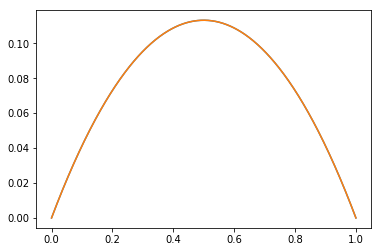

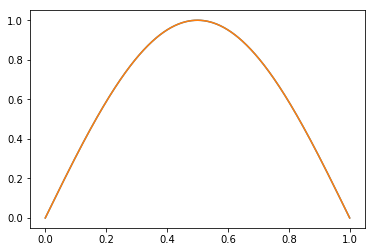

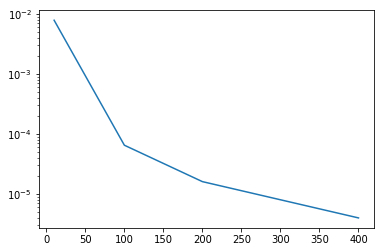

In [5]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def matA(n):
    
    K=(np.diag(np.ones(n-1),1)-2*np.eye(n)+np.diag(np.ones(n-1),-1))*(n-1)
    M=((1/6)*np.diag(np.ones(n-1),1)+(2/3)*np.eye(n)+(1/6)*np.diag(np.ones(n-1),-1))*(1/(n-1))
    A=-K+M
    A[0,0]=1
    A[n-1,n-1]=1
    A[0,1:]=0
    A[n-1,:-1]=0
    return A,K,M

def F(f,x,a,b):
    Ft=f(x)/(len(x)-1)
    Ft[0]=a
    Ft[-1]=b
    return Ft

n=500
x=np.linspace(0,1,n)
f=lambda x: np.ones(len(x))
uexact =lambda x: 1-(np.exp(x)+np.exp(1-x))/(1+np.exp(1))
A=matA(n)[0]

u=np.linalg.solve(A,F(f,x,0,0))

plt.plot(x,u)
plt.plot(x,uexact(x))


f=lambda x: (1+np.pi**2)*np.sin(np.pi*x)
uexact =lambda x: np.sin(np.pi*x)
A=matA(n)[0]

u=np.linalg.solve(A,F(f,x,0,0))

plt.figure()

plt.plot(x,u)
plt.plot(x,uexact(x))

k=[10, 100, 200, 400]
err=[]
for i in k:
    x=np.linspace(0,1,i)
    A=matA(i)[0]
    u=np.linalg.solve(A,F(f,x,0,0))
    err.append(np.sqrt(np.dot(np.dot(u-uexact(x),matA(i)[2]),u-uexact(x))))
    
plt.figure()
plt.plot(k,err)
#plt.xscale('log')
plt.yscale('log')


## 2. Conditions aux limites mixtes.

Soit maintenant $p>0$ et considérons le problème 

$$
(\tilde{P})\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]0,1[,\\
&u(0)=0,\ u'(1)+pu(1)=0.
\end{aligned}
\right.
$$

**Q8)** Ecrire la formulation variationnelle de $\tilde{P}$ dans l'espace 
$$ 
\tilde{V} = \left\{ v \in L^2(]0,1[)\,:\, v' \in L^2(]0,1[),\ 
v(0)=0 \right\}.
$$

Pour approcher le problème $\tilde{P}$ on considère, avec les mêmes notations qu'avant, l'espace 
$$ 
\tilde{V}_h \ = \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(0)=0 \right \}.
$$

L'espace $\tilde{V}_h$ est un espace de dimension finie $n+1$ dont une base est constituée des fonctions $\varphi_i,$  $i=1,\dots,n+1,$ avec  $\varphi_{n+1}$ la fonction continue, affine sur $[x_i,x_{i+1}],$ pour tout $i,$ tel que $\varphi_{n+1}(x_{n+1})=1,\ \varphi_{n+1}(x_i)=0,\ $ pour $i=1,\dots,n.$

**Q9)**Re-écrire le problème variationnel discret associé à la formulation variationnelle trouvée dans **Q8**. Ecrire un programme donnant la solution approchée de $\tilde{P}$ dans le cas $p=1,$ $f=(\pi^2+1)\sin(\pi x)+\frac{\pi}{2}x,$ pour lequel la solution exacte de $\tilde{P}$ est donnée par $u(x)=\sin(\pi x)+\frac{\pi}{2}x.$ 
